In [130]:
import pandas as pd

In [131]:
import numpy as np

In [132]:
import matplotlib.pyplot as plt

In [133]:
import seaborn as sns

In [134]:
%matplotlib inline

In [135]:
##Загрузим тренировочные данные

In [136]:
training_set = pd.read_csv('train.csv')

In [137]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
##Посмотрим какие значения нулевые

In [139]:
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [140]:
## Загрузим в heatmap

<AxesSubplot:>

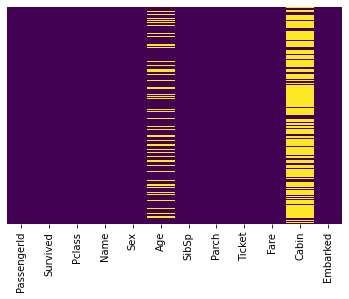

In [141]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [142]:
## Жёлтые чёрточки - отсутствющие данные

<AxesSubplot:xlabel='Survived', ylabel='count'>

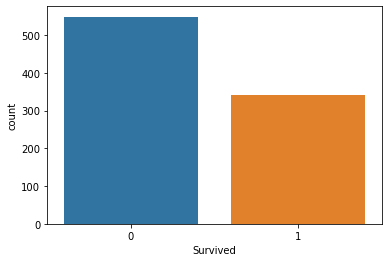

In [143]:
sns.countplot(x = 'Survived', data = training_set)

<AxesSubplot:xlabel='Survived', ylabel='count'>

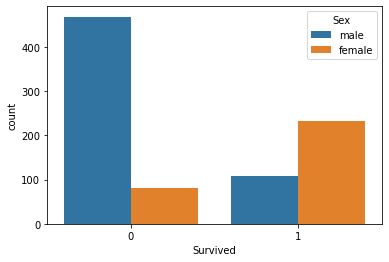

In [144]:
##выжившые (по гендеру)
sns.countplot(x = 'Survived', data = training_set, hue= 'Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

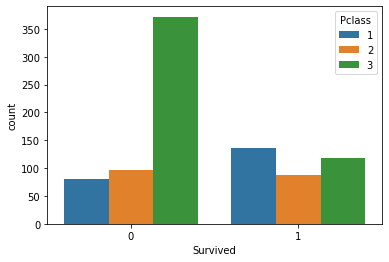

In [145]:
##выжившые (по классу каюты)
sns.countplot(x = 'Survived', data = training_set, hue= 'Pclass')

/Users/maksimnazarov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

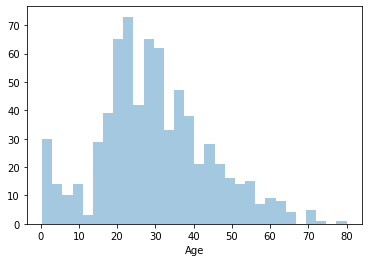

In [146]:
## Возраст людей на титанике
sns.distplot(training_set['Age'].dropna(), kde= False, bins = 30)

<AxesSubplot:ylabel='Frequency'>

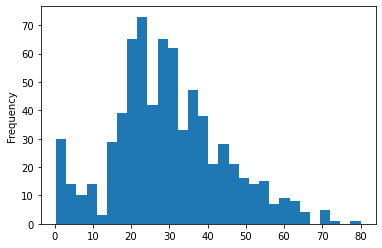

In [147]:
## Гистограмма по возрасту
training_set['Age'].plot.hist(bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

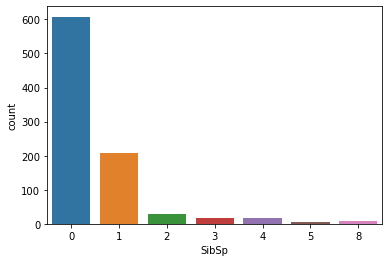

In [148]:
## Исследуем родственников/супругов
sns.countplot(x = 'SibSp', data = training_set)

<AxesSubplot:>

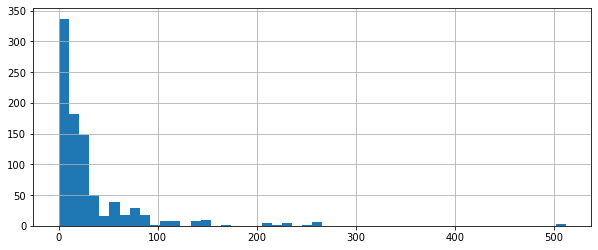

In [149]:
training_set['Fare'].hist(bins = 50, figsize = (10,4))

In [150]:
## Экскурс 
## Найдены отсутствующие значения
## Соотношение выживышых и погибших
## Соотношение выживышых и погибших по половому признаку
## Соотношение выживышых и погибших по классу каюты
## Распределение возраста
## Статистика наличия родственников
## Статистика цен на билеты. Но зачем они покупали за такие деньги
##Авиасейлс помогает найти и купить самые дешёвые авиабилеты. 
##Поиск билетов на самолёт по 728 авиакомпаниям, ведущим авиакассам и лучшие цены на авиабилеты.



In [151]:
## Подготовим данные

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

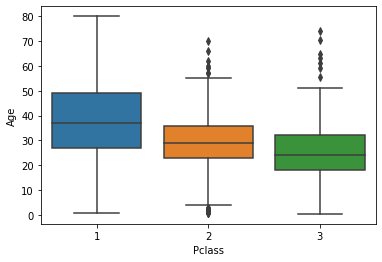

In [152]:
sns.boxplot(x = 'Pclass', y = 'Age', data = training_set)

In [153]:
## Средний возраст пассажиров 1 класса > 2 класса > 3 класса

In [154]:
## Основываясь на этих данных, будем заполнять пустые данные 

In [155]:
## Создадим функции для замены пустых данных

In [156]:
def imput_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [157]:
## Создаём функцию для подгонки возраста в соответсвии со средним возрастом для класса

In [158]:
training_set['Age'] = training_set[['Age', 'Pclass']].apply(imput_age, axis = 1)

In [159]:
## Вызываем функцию и проверяем на работоспособность

<AxesSubplot:>

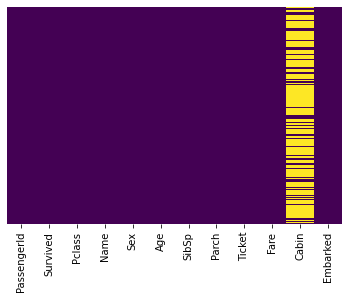

In [160]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [161]:
## Особого смысла в номерах кабин нет, так что вырежем их вовсе

In [162]:
training_set.drop('Cabin', axis = 1, inplace= True)

In [163]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [164]:
## создадим фиктивные переменные для пола и порта прибытия

In [165]:
pd.get_dummies(training_set['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [166]:
## Во избежание мультиколлинеарности избавимся от одного столбца

In [167]:
sex = pd.get_dummies(training_set['Sex'], drop_first= True)

In [168]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [169]:
embarked = pd.get_dummies(training_set['Embarked'], drop_first= True)

In [170]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [171]:
## Добавим фиктивные переменные в training_test

In [172]:
training_set = pd.concat([training_set, sex, embarked], axis = 1)

In [173]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [174]:
## удалим теперь уже ненужные переменные

In [175]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace=True)

In [176]:
training_set.drop('PassengerId', axis = 1, inplace=True)

In [177]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
## Данные для ML готовы